In [1]:
import pandas as pd
import numpy as np

In [2]:
height = [60,62,65,68,70,74]
weight = [140,138,150,166,190,250]

In [5]:
np.corrcoef(height, weight)[0][1]

0.9298974521408027

In [6]:
df = pd.read_csv('https://www.ishelp.info/data/insurance.csv')

In [10]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [14]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [16]:
df.select_dtypes(include=['float64','int64']).corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [17]:
df.charges.corr(df.bmi)

0.19834096883362895

In [18]:
from scipy import stats

In [25]:
r,p = stats.pearsonr(df.charges, df.age)
print(round(r,4))
print(round(p,29))

0.299
5.0000000000000004e-29


In [32]:
corr_df = pd.DataFrame(columns=['r','p'])
for col in df:
    if pd.api.types.is_numeric_dtype(df[col]):
        r,p = stats.pearsonr(df.charges, df[col])
        corr_df.loc[col] = [round(r,3), round(p,3)]

corr_df

,r,p
age,0.299,0.000
bmi,0.198,0.000
children,0.068,0.013
charges,1.000,0.000


In [33]:
import matplotlib.pyplot as plt

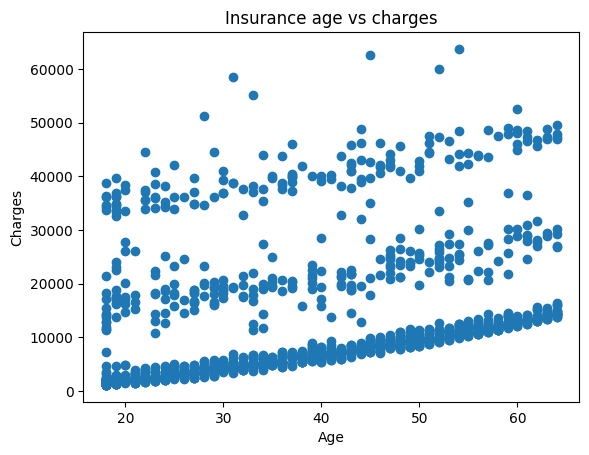

In [37]:
plt.scatter(df.age , df.charges)
plt.title("Insurance age vs charges")
plt.xlabel("Age")
plt.ylabel("Charges")
plt.show()


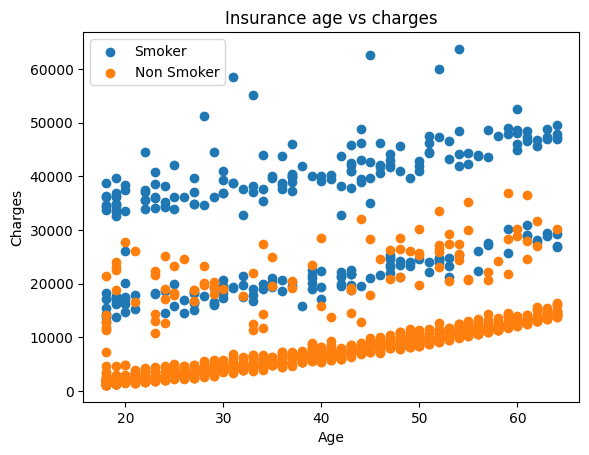

In [43]:
df_smoker = df[df['smoker']=='yes']
df_nonsmoker = df[df['smoker']=='no']

plt.scatter(df_smoker.age , df_smoker.charges, label='Smoker')
plt.scatter(df_nonsmoker.age , df_nonsmoker.charges, label='Non Smoker')
plt.title("Insurance age vs charges")
plt.xlabel("Age")
plt.ylabel("Charges")
plt.legend()
plt.show()

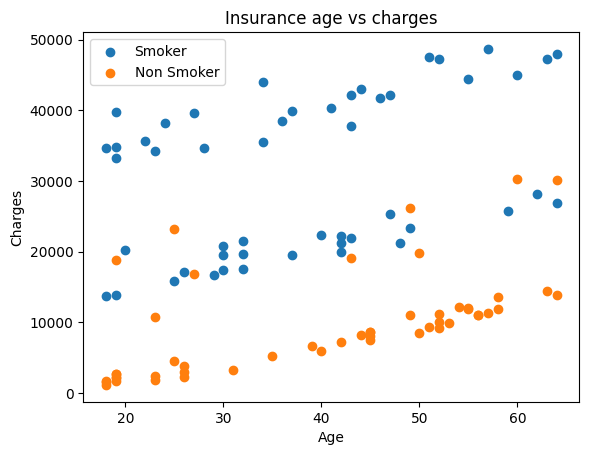

In [46]:
df_smoker_reduced = df_smoker.sample(50)
df_nonsmoker_reduced = df_nonsmoker.sample(50)

plt.scatter(df_smoker_reduced.age , df_smoker_reduced.charges, label='Smoker')
plt.scatter(df_nonsmoker_reduced.age , df_nonsmoker_reduced.charges, label='Non Smoker')
plt.title("Insurance age vs charges")
plt.xlabel("Age")
plt.ylabel("Charges")
plt.legend()
plt.show()

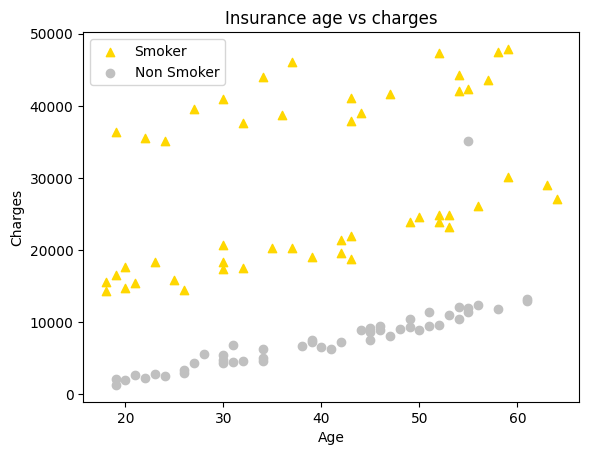

In [48]:
df_smoker_reduced = df_smoker.sample(50)
df_nonsmoker_reduced = df_nonsmoker.sample(50)

plt.scatter(df_smoker_reduced.age , df_smoker_reduced.charges, label='Smoker', color = 'gold', marker='^')
plt.scatter(df_nonsmoker_reduced.age , df_nonsmoker_reduced.charges, label='Non Smoker', color ='silver', marker='o')
plt.title("Insurance age vs charges")
plt.xlabel("Age")
plt.ylabel("Charges")
plt.legend()
plt.show()

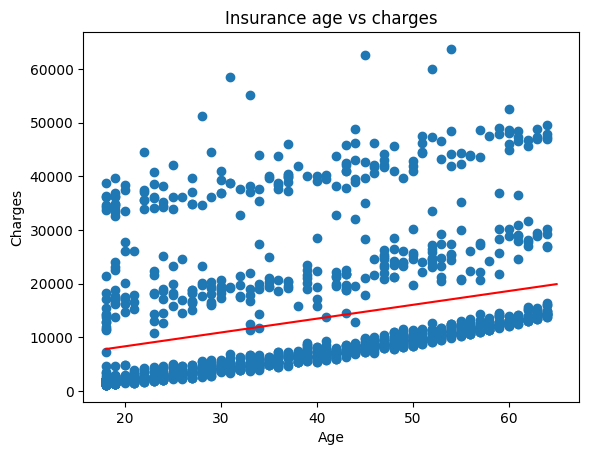

In [56]:
from scipy import stats
m,b,r,p,err = stats.linregress(df.age,df.charges)

# y=mx+b
x= range(df.age.min(),df.age.max()+2)
y = m*x + b
plt.plot(x,y, color='red')
plt.scatter(df.age , df.charges)
plt.title("Insurance age vs charges")
plt.xlabel("Age")
plt.ylabel("Charges")
plt.show()

In [ ]:
from statsmodels.stats.diagnostic import het_breuschpagan